In [2]:
import os, re, json, requests
import PyPDF2
import urllib.request
from bs4 import BeautifulSoup


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import maps

In [4]:
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

In [5]:
DATA_DIR = 'data/'
!ls $DATA_DIR; tree $DATA_DIR/

2015                     asec_csv_repwgt_2023.csv pppub23.csv
2019                     ffpub23.csv
2021                     hhpub23.csv
zsh:1: command not found: tree


In [6]:
# the following pages in the pdfs contain the variable names, size and their location
page_limits = {
    '2007': [21, 141],
    '2009': [21, 138],
    '2010': [21, 143],
    '2011': [21, 163],
    '2013': [21, 147],
    '2015': [21, 150],
    '2017': [21, 145]
    # we already have pdfs for 2019 and 2021
}



# link to html pages with all variables for internet supplement
# primary link: https://api.census.gov/data.html ---> go to this and click on variables tab
html_file_urls = {
    '2007': 'https://api.census.gov/data/2007/cps/internet/oct/variables.html',
    '2009': 'https://api.census.gov/data/2009/cps/internet/oct/variables.html',
    '2010': 'https://api.census.gov/data/2010/cps/internet/oct/variables.html',
    '2011': 'https://api.census.gov/data/2011/cps/internet/jul/variables.html',
    '2013': 'https://api.census.gov/data/2013/cps/internet/jul/variables.html',
    '2015': 'https://api.census.gov/data/2015/cps/internet/jul/variables.html',
    '2017': 'https://api.census.gov/data/2017/cps/internet/nov/variables.html',
    '2019': 'https://api.census.gov/data/2019/cps/internet/nov/variables.html',
    '2021': 'https://api.census.gov/data/2021/cps/internet/nov/variables.html'
}

# variables = {

# }

In [7]:
def find_variables_list(url):
    listing = url
    content = requests.get(listing)
    soup = BeautifulSoup(content.text)

    tbody = soup.find_all("tbody".split())[0]
    anchortags = tbody.find_all('a', href=True)[::2]
    variables = list([anchortag['name'] for anchortag in anchortags
                     if anchortag['name'] not in ["for", "in", "ucgid"]
                     ])
    return variables
    
    
def find_variables_list_all(urls):
    
    variables = {}
    
    for year, url in urls.items():
        variables[year] = find_variables_list(url)
        print(f"year {year}: found #{len(variables[year])} variables")
    
    return variables

variables_all = find_variables_list_all(html_file_urls)

year 2007: found #370 variables
year 2009: found #385 variables
year 2010: found #417 variables
year 2011: found #525 variables
year 2013: found #476 variables
year 2015: found #486 variables
year 2017: found #492 variables
year 2019: found #492 variables
year 2021: found #499 variables


In [8]:
PERSONTYPE = 'PRPERTYP'
SEX = 'PESEX'
AGE = 'PRTAGE'
STATECODE = 'GESTFIPS'
SOCIALMEDIA = 'PESOCIAL'
TEXTING = 'PETEXTIM'
EMAIL = 'PEEMAIL'

# During the past year, (have you/has any member of your household) been affected by an
# online security breach, identity theft, or a similar crime?
CYBERCRIME='HEPSCYBA'


#what concerns (you/members of this household) the most when it comes to online privacy and security risks?
CONCERNS_MAP = {
    'HEPSCON1': 'Identity theft',
    'HEPSCON2': 'Credit card or banking fraud',
    'HEPSCON3': 'Data collection or tracking by online services',
    'HEPSCON4': 'Data collection or tracking by government',
    'HEPSCON5': 'Loss of control over personal data such as email or social network profiles',
    'HEPSCON6': 'Threats to personal safety, such as online harassment, stalking, or cyberbullying',
    'HEPSCON8': 'Other concerns'
}

# During the past year, have concerns about privacy or security STOPPED (you/anyone in this household)
# from doing any of these activities online
ACTIVITIES_MAP = {
    'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
    'HEPSPRE2': 'Buying goods or services online?',
    'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
    'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
    'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'
}



In [9]:
year = '2021'
variables = variables_all[year]
CSV_FILE_PATH = os.path.join(DATA_DIR, f"{year}/nov{year[2:]}pub.csv")

In [10]:
year1 = '2019'
variables1 = variables_all[year1]
CSV_FILE_PATH1 = os.path.join(DATA_DIR, f"{year1}/nov{year1[2:]}pub.csv")

In [11]:
CSV_FILE_PATH, CSV_FILE_PATH1

('data/2021/nov21pub.csv', 'data/2019/nov19pub.csv')

In [12]:
df19 = pd.read_csv(CSV_FILE_PATH1)
# filter out only adults and (male/female) population
df19 = df19[(df19[PERSONTYPE] == 2) * (df19[SEX] != -1)]

In [13]:
df19

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,HULANGCODE,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,FILLER,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GCFIP,GCTCB,GCTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GCTCS,PERRP,PEPARENT,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PUERNH1C,PEERNH2,PEERNH1O,PRERNHLY,PTHR,PEERNHRO,PRERNWA,PTWK,PEERN,PUERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,...,PXINUSYR,PXRRP,PXPARENT,PXAGE,PXMARITL,PXSPOUSE,PXSEX,PXAFWHN1,PXAFNOW,PXEDUCA,PXRACE1,PXNATVTY,PXMNTVTY,PXFNTVTY,PXNMEMP1,PXHSPNON,PXMLR,PXRET1,PXABSRSN,PXABSPDO,PXMJOT,PXMJNUM,PXHRUSL1,PXHRUSL2,PXHRFTPT,PXHRUSLT,PXHRWANT,PXHRRSN1,PXHRRSN2,PXHRACT1,PXHRACT2,PXHRACTT,PXHRRSN3,PXHRAVL,PXLAYAVL,PXLAYLK,PXLAYDUR,PXLAYFTO,PXLKM1,PXLKAVL,PXLKLL1O,PXLKLL2O,PXLKLWO,PXLKDUR,PXLKFTO,PXDWWNTO,PXDWRSN,PXDWLKO,PXDWWK,PXDW4WK,PXDWLKWK,PXDWAVL,PXDWAVR,PXJHWKO,PXJHRSN,PXJHWANT,PXIO1COW,PXIO1ICD,PXIO1OCD,PXIO2COW,PXIO2ICD,PXIO2OCD,PXERNUOT,PXERNPER,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PEIO1OCD,PEIO2ICD,PEIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PELNDAD,PELNMOM,PEDADTYP,PEMOMTYP,PECOHAB,PXLNDAD,PXLNMOM,PXDADTYP,PXMOMTYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMSU,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEPECOMP,PEEMAIL,PETEXTIM,PESOCIAL,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEHOMIOT,HEMEDDOC,HEMEDREC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HECBULLY,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HEPSENSI,HEEVROUT,HENOOU1,HENOOU2,HEN

In [14]:
df21 = pd.read_csv(CSV_FILE_PATH)
df21 = df21[(df21[PERSONTYPE] == 2) * (df21[SEX] != -1)]
columns = df21.columns.to_list()
df21

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNPER,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PX

In [15]:
# intersection = list(set(columns).intersection(set(variables)))
# len(intersection)

In [16]:
# difference = list(set(columns).difference(set(variables)))
# len(difference)

In [17]:
# df = df21[(df21[PERSONTYPE] == 2) * (df21[SEX] != -1)]

## Inspect each useful column

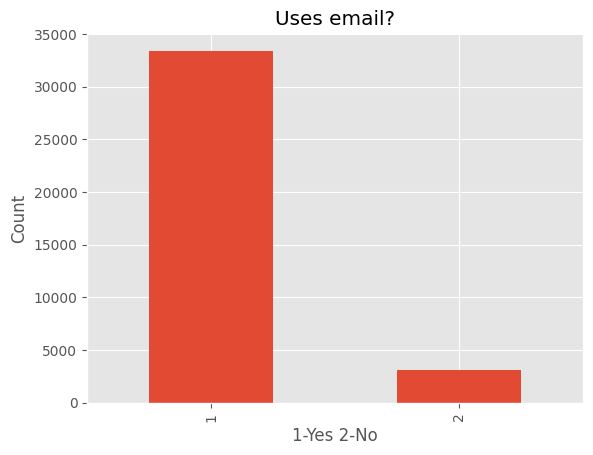

In [18]:
ax = df21.query('PEEMAIL != -1')[EMAIL].value_counts().plot(kind='bar', title='Uses email?')
ax.set_xlabel("1-Yes 2-No")
ax.set_ylabel("Count")
# 1-yes
# 2-no
# -1 -did not respond
plt.show()

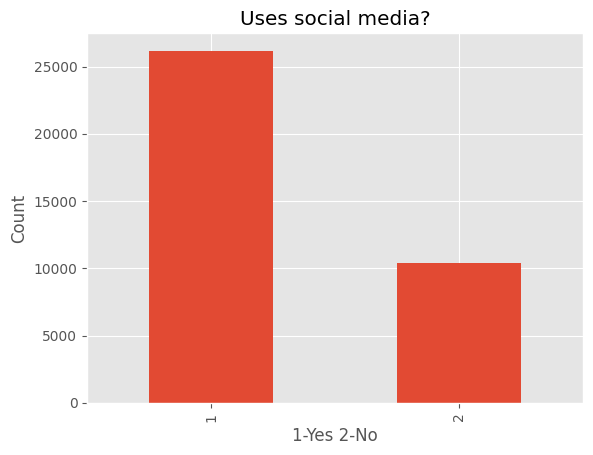

In [19]:
ax = df21.query('PESOCIAL != -1')[SOCIALMEDIA].value_counts().plot(kind='bar', title='Uses social media?')
ax.set_xlabel("1-Yes 2-No")
ax.set_ylabel("Count")
plt.show()

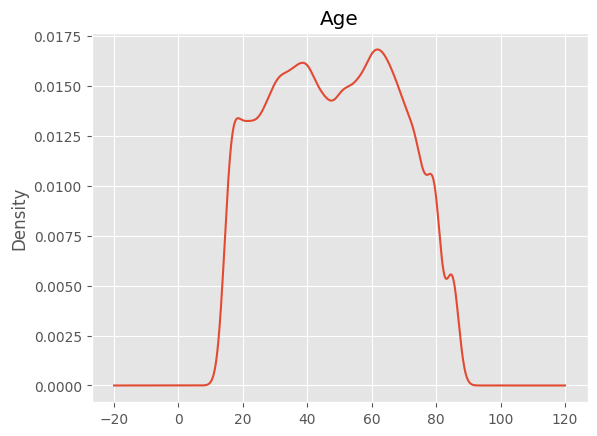

In [20]:
ax = df21[AGE].plot(kind='kde', title='Age')

Text(0.5, 0, '2-Female, 1-Male')

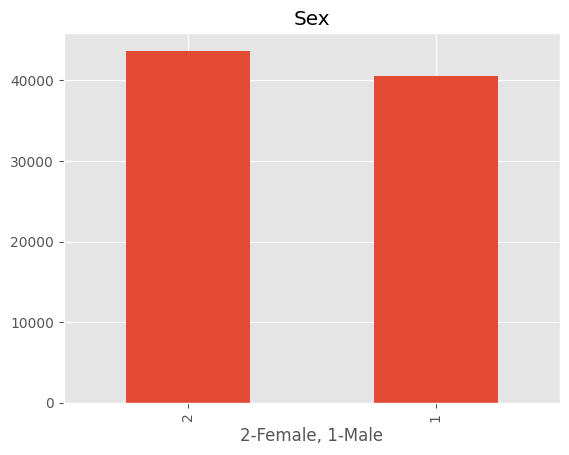

In [21]:
ax = df21[SEX].value_counts().plot(kind='bar', title='Sex')
ax.set_xlabel("2-Female, 1-Male")

In [22]:
df21['state'] = df21.apply(lambda row: maps.StatesMap[row[STATECODE]], axis=1)

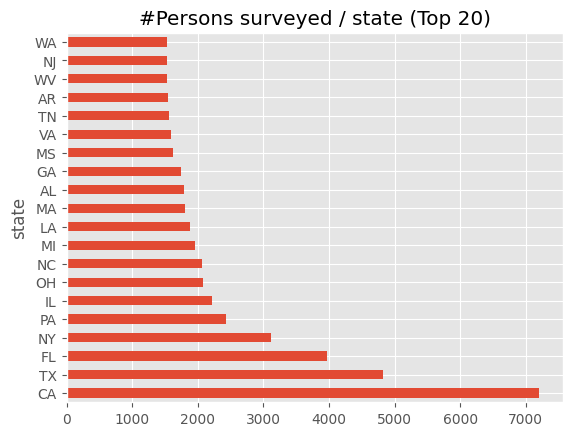

In [23]:
df21['state'].value_counts().head(20).plot(kind='barh', title='#Persons surveyed / state (Top 20)')
plt.show()

<Axes: xlabel='HEPSCYBA'>

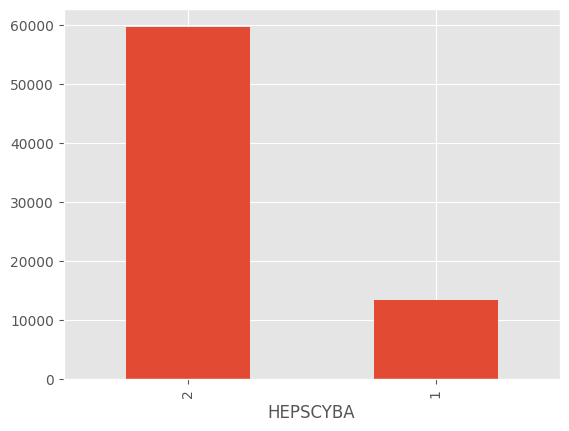

In [24]:
df21.query('HEPSCYBA != -1')[CYBERCRIME].value_counts().plot(kind='bar')

## Inspecting pairs of columns together
- male/female email/social media usage
- state wise email/social media usage (fractional because different states have different people)
note that we need to normalize by #total people in that state!!

In [25]:
concerns = [f'HEPSCON{i}' for i in range(1, 9) if i!=7]
activities = list(ACTIVITIES_MAP.keys())
activities

['HEPSPRE1', 'HEPSPRE2', 'HEPSPRE3', 'HEPSPRE4', 'HEPSPRE5']

# Q: In a given state, what is the concern that most people have?

In [26]:
state_population = df21['state'].value_counts().to_dict()
state_population['AL']

1794

In [27]:
state_concern_map = {}
for statecode, statename in maps.StatesMap.items():
    print(statename)
    
    _df = df21.query('state == @statename')[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    state_concern_map[statename] = concerns[count_concern.index(max(count_concern))]
    
    print(f"For state: {statename}, highest concern: {CONCERNS_MAP[state_concern_map[statename]]}")
    
#     break
    

AL
[806, 681, 400, 332, 407, 236, 34]
For state: AL, highest concern: Identity theft
MT
[607, 552, 334, 207, 288, 116, 32]
For state: MT, highest concern: Identity theft
AK
[378, 319, 215, 135, 172, 96, 30]
For state: AK, highest concern: Identity theft
NE
[457, 357, 202, 177, 213, 120, 35]
For state: NE, highest concern: Identity theft
AZ
[493, 442, 304, 192, 244, 160, 36]
For state: AZ, highest concern: Identity theft
NV
[437, 400, 240, 196, 186, 136, 11]
For state: NV, highest concern: Identity theft
AR
[721, 636, 318, 228, 252, 168, 24]
For state: AR, highest concern: Identity theft
NH
[531, 403, 231, 161, 230, 92, 47]
For state: NH, highest concern: Identity theft
CA
[3444, 2724, 1715, 1144, 1537, 956, 242]
For state: CA, highest concern: Identity theft
NJ
[839, 631, 447, 327, 319, 240, 40]
For state: NJ, highest concern: Identity theft
CO
[537, 427, 357, 209, 263, 135, 45]
For state: CO, highest concern: Identity theft
NM
[686, 569, 382, 281, 338, 208, 12]
For state: NM, highest 

# Q In a state, what is the social media related activity that people are hesitant to do?

In [131]:
state_activity_map = {}
for statecode, statename in maps.StatesMap.items():
    print(statename)
    
    _df = df21.query('state == @statename')[activities]  # get the df for that state
    count_activities = [_df[activity].value_counts()[1] for activity in activities]  # 1--yes
    print(count_activities)
    state_activity_map[statename] = activities[count_activities.index(max(count_activities))]

    print(f"For state: {statename}, people hesitate to do: {ACTIVITIES_MAP[state_activity_map[statename]]}")
    
#     break
    

AL
[235, 190, 147, 143, 82]
For state: AL, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
MT
[225, 174, 206, 173, 91]
For state: MT, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AK
[138, 105, 97, 133, 78]
For state: AK, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
NE
[144, 97, 120, 121, 79]
For state: NE, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AZ
[219, 153, 145, 143, 113]
For state: AZ, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
NV
[210, 155, 141, 126, 112]
For state: NV, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AR
[270, 179, 126, 134, 93]
For state: AR, people hesitate to do: Conducting financial t

# Male vs. female concerns/activities?

In [150]:
_df = df21.query('PESEX == 1')[concerns]
male_concerns = np.array([_df[concern].value_counts()[1] for concern in concerns])
male_concerns = male_concerns / male_concerns.sum()
male_concerns

array([0.28590421, 0.23762614, 0.15023226, 0.10653532, 0.13003364,
       0.07025469, 0.01941374])

In [146]:
_df[concerns[1]].value_counts()[1]

14835

In [151]:
_df = df21.query('PESEX != 1')[concerns]
female_concerns = np.array([_df[concern].value_counts()[1] for concern in concerns])
female_concerns = female_concerns / female_concerns.sum()
female_concerns

array([0.28715105, 0.23872733, 0.14758536, 0.10568218, 0.12901348,
       0.07332693, 0.01851367])

In [148]:
CONCERNS_MAP

{'HEPSCON1': 'Identity theft',
 'HEPSCON2': 'Credit card or banking fraud',
 'HEPSCON3': 'Data collection or tracking by online services',
 'HEPSCON4': 'Data collection or tracking by government',
 'HEPSCON5': 'Loss of control over personal data such as email or social network profiles',
 'HEPSCON6': 'Threats to personal safety, such as online harassment, stalking, or cyberbullying',
 'HEPSCON8': 'Other concerns'}

In [152]:
_df = df21.query('PESEX == 1')[activities]
male_activities = np.array([_df[activity].value_counts()[1] for activity in activities])
male_activities = male_activities / male_activities.sum()
male_activities

array([0.26920646, 0.19941843, 0.20363269, 0.19646846, 0.13127397])

In [154]:
_df = df21.query('PESEX != 1')[activities]
female_activities = np.array([_df[activity].value_counts()[1] for activity in activities])
female_activities = female_activities / female_activities.sum()
female_activities

array([0.27086948, 0.19988433, 0.20343166, 0.19741662, 0.12839792])

In [155]:
ACTIVITIES_MAP

{'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
 'HEPSPRE2': 'Buying goods or services online?',
 'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
 'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
 'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'}

# crime per state

In [30]:
crime_per_state = df21.query('HEPSCYBA == 1')['state'].value_counts().to_dict()
crime_per_state_normalized = {key: crime_per_state[key]/state_population[key] for key in crime_per_state}
crime_per_state_normalized

import plotly.express as px

fig = px.choropleth(locations=list(crime_per_state_normalized.keys()),
                    locationmode="USA-states",
                    color=list(crime_per_state_normalized.values()),
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Normalized cybercrime rate per state"
                   )
fig.show()

In [31]:
internet_per_state = df21.query('HEINHOME == 1')['state'].value_counts().to_dict()
internet_per_state_normalized = {key: internet_per_state[key]/state_population[key] for key in internet_per_state}
internet_per_state_normalized

import plotly.express as px

fig = px.choropleth(locations=list(internet_per_state_normalized.keys()),
                    locationmode="USA-states",
                    color=list(internet_per_state_normalized.values()),
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Normalized cybercrime rate per state"
                   )
fig.show()

In [39]:
# Calculate the correlation coefficient for crime_per_state_normalized and internet_per_state_normalized

import scipy.stats as stats


x = []
y = []
for state in crime_per_state_normalized:
    if state in internet_per_state_normalized:
        x.append(crime_per_state_normalized[state])
        y.append(internet_per_state_normalized[state])

print(stats.pearsonr(x, y))
print(stats.spearmanr(x, y))

PearsonRResult(statistic=0.49530339424672903, pvalue=0.00021962595790039717)
SignificanceResult(statistic=0.504343891402715, pvalue=0.00016092458536103314)


## Age vs types of concerns/activities - do we see a pattern?

## Industry vs concerns and activities?

In [46]:
industry_jobid_mapping = maps.ind

# each industry has a list of job IDs we need to query in the "PRDTIND1" column

industry_concerns = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'PRDTIND1 == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    industry_concerns[industry] = concerns[count_concern.index(max(count_concern))]

    print(f"For industry: {industry}, highest concern: {CONCERNS_MAP[industry_concerns[industry]]}")

industry_activities = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'PRDTIND1 == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    industry_activities[industry] = activities[count_activities.index(max(count_activities))]

    print(f"For industry: {industry}, people hesitate to do: {ACTIVITIES_MAP[industry_activities[industry]]}")

# check if the distribution of concerns is different for different industries


Construction and mining
[525, 467, 264, 195, 239, 130, 35]
For industry: Construction and mining, highest concern: Identity theft
Finance and business services
[459, 382, 256, 185, 224, 109, 43]
For industry: Finance and business services, highest concern: Identity theft
Manufacturing
[1557, 1298, 798, 609, 691, 369, 101]
For industry: Manufacturing, highest concern: Identity theft
Trade, transportation, and utilities
[262, 229, 138, 101, 127, 72, 21]
For industry: Trade, transportation, and utilities, highest concern: Identity theft
Education and health
[340, 277, 175, 136, 162, 78, 18]
For industry: Education and health, highest concern: Identity theft
Leisure and hospitality
[72, 54, 31, 18, 18, 18, 8]
For industry: Leisure and hospitality, highest concern: Identity theft
Public administration
[254, 192, 129, 116, 116, 71, 21]
For industry: Public administration, highest concern: Identity theft
Armed forces
[226, 196, 107, 101, 102, 60, 12]
For industry: Armed forces, highest concer

## Education vs concerns/activities

In [54]:
education_educationid_mapping = maps.educ

education_concerns = {}
education_concerns_count = {}

for education, educationids in education_educationid_mapping.items():
    query_string = ' or '.join([f'PEEDUCA == {educationid}' for educationid in educationids])
    print(education)
    _df = df21.query(query_string)[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    education_concerns[education] = concerns[count_concern.index(max(count_concern))]
    education_concerns_count[education] = count_concern

    print(f"For education: {education}, highest concern: {CONCERNS_MAP[education_concerns[education]]}")

education_activities = {}
education_activities_count = {}

for education, educationids in education_educationid_mapping.items():
    query_string = ' or '.join([f'PEEDUCA == {educationid}' for educationid in educationids])
    print(education)
    _df = df21.query(query_string)[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    education_activities[education] = activities[count_activities.index(max(count_activities))]
    education_activities_count[education] = count_activities

    print(f"For education: {education}, people hesitate to do: {ACTIVITIES_MAP[education_activities[education]]}")

LTHS
[3789, 3065, 1749, 1310, 1571, 1055, 266]
For education: LTHS, highest concern: Identity theft
HS
[9499, 7904, 4500, 3436, 4092, 2331, 538]
For education: HS, highest concern: Identity theft
SC
[10040, 8523, 5395, 3971, 4623, 2557, 676]
For education: SC, highest concern: Identity theft
COLL
[8709, 7248, 4836, 3267, 4087, 2176, 619]
For education: COLL, highest concern: Identity theft
ADV
[5541, 4497, 3039, 1928, 2609, 1305, 385]
For education: ADV, highest concern: Identity theft
LTHS
[1428, 1144, 979, 850, 652]
For education: LTHS, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
HS
[3535, 2565, 2318, 2189, 1483]
For education: HS, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
SC
[3646, 2593, 2636, 2585, 1755]
For education: SC, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
COLL
[2992, 2246, 2479

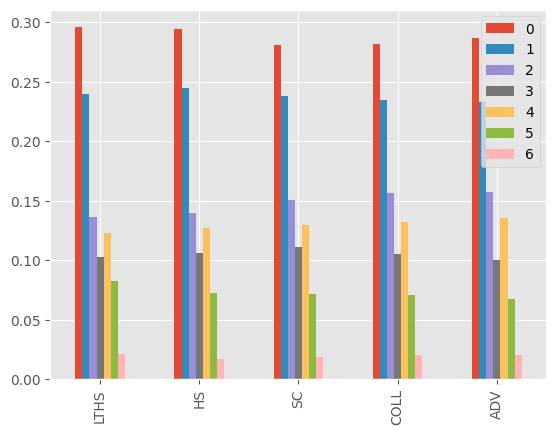

In [57]:
# plot a bar chart of concerns by education level using the education_educationid_mapping dictionary

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in education_concerns_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

In [58]:
df

,0,1,2,3,4,5,6
LTHS,0.295900,0.239360,0.136587,0.102304,0.122686,0.082390,0.020773
HS,0.294087,0.244706,0.139319,0.106378,0.126687,0.072167,0.016656
SC,0.280564,0.238172,0.150761,0.110968,0.129188,0.071455,0.018891
COLL,0.281462,0.234245,0.156292,0.105585,0.132086,0.070325,0.020005
ADV,0.287039,0.232957,0.157429,0.099876,0.135153,0.067603,0.019944


## take a specific concern, and see the demographics

In [183]:
# df21.query('HEPSCON1 == 1')['state'].value_counts()

In [184]:
# df21.query('HEPSCON2 == 1')['state'].value_counts()

In [112]:
_df = df21.query('state == "AL"')[concerns]
_df

,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8
0,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2
5,1,1,1,1,2,2,2
6,1,1,2,2,2,2,2
7,1,1,2,2,2,2,2
...,...,...,...,...,...,...,...
126581,2,2,2,2,2,2,2
126582,2,2,2,2,2,2,2
126583,2,2,2,2,2,2,2
126586,1,2,2,2,2,2,2


In [126]:
# df21.query(f'state == @statename')

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PXINWORK,PX

In [59]:
df[EMAIL].value_counts()

PEEMAIL
-1    47647
 1    33413
 2     3146
Name: count, dtype: int64

In [61]:
df[SOCIALMEDIA].value_counts()

PESOCIAL
-1    47647
 1    26176
 2    10383
Name: count, dtype: int64

In [69]:
df[TEXTING].value_counts()

PETEXTIM
-1    47647
 1    33657
 2     2902
Name: count, dtype: int64

In [68]:
df[(df[EMAIL] == -1) * (df[SOCIALMEDIA] == -1)]

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,...,PXEDTRAI,PXEGOVTS,PXUSESVC,PXESRVCS,PXECOMME,PXEGOODS,PXFINANC,PXVOICEA,PXHOMIOT,PWPRMWGT
1,610905110108708,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
6,201967201670009,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8,201967201670009,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
9,201967201670009,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
12,609005258110007,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127368,101965060011655,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
127370,156485901801505,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
127372,167066394505701,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
127373,167066394505701,11,2021,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [32]:
df[SEX].value_counts()

PESEX
2    43661
1    40545
Name: count, dtype: int64

In [36]:
df[AGE]

0         24
1         28
5         45
6         30
7         28
          ..
127369    73
127370    65
127372    61
127373    58
127374    41
Name: PRTAGE, Length: 84206, dtype: int64

In [99]:
df21[CYBERCRIME].value_counts()/df21.shape[0]

HEPSCYBA
 2    0.708655
 1    0.157958
-1    0.133387
Name: count, dtype: float64

In [100]:
df19[CYBERCRIME].value_counts()/df19.shape[0]

HEPSCYBA
 2    0.692521
 1    0.169014
-1    0.138465
Name: count, dtype: float64

In [53]:
l = [f'HEPSCON{i}' for i in range(1, 9) if i!=7]
l

['HEPSCON1',
 'HEPSCON2',
 'HEPSCON3',
 'HEPSCON4',
 'HEPSCON5',
 'HEPSCON6',
 'HEPSCON8']

In [105]:
for _l in l:
    print(df21[_l].value_counts()/df21.shape[0] )

HEPSCON1
 1    0.446263
 2    0.420350
-1    0.133387
Name: count, dtype: float64
HEPSCON2
 2    0.495654
 1    0.370959
-1    0.133387
Name: count, dtype: float64
HEPSCON3
 2    0.634812
 1    0.231801
-1    0.133387
Name: count, dtype: float64
HEPSCON4
 2    0.701399
 1    0.165214
-1    0.133387
Name: count, dtype: float64
HEPSCON5
 2    0.664941
 1    0.201672
-1    0.133387
Name: count, dtype: float64
HEPSCON6
 2    0.754697
-1    0.133387
 1    0.111916
Name: count, dtype: float64
HEPSCON8
 2    0.837114
-1    0.133387
 1    0.029499
Name: count, dtype: float64
